In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

from PCA import PCA, KernelPCA
from NMF import NMF

# Linear Dimensionality Reduction

## Loading Example Data

In [2]:
data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(data.data,
                                                    data.target,
                                                    test_size=0.2,
                                                    random_state=42)

[]

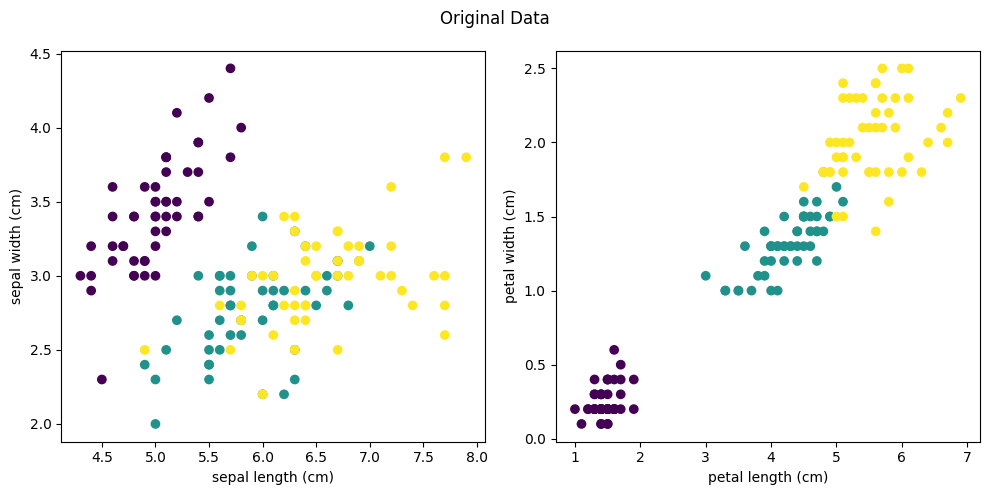

In [3]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].scatter(X[:,0], X[:,1], c=y)
ax[0].set_xlabel(data.feature_names[0])
ax[0].set_ylabel(data.feature_names[1])

ax[1].scatter(X[:,2], X[:,3], c=y)
ax[1].set_xlabel(data.feature_names[2])
ax[1].set_ylabel(data.feature_names[3])

fig.suptitle('Original Data')

plt.tight_layout()

plt.plot()

## Principal Component Analysis (PCA)

In [4]:
pca = PCA(n_comp=2)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

print("Original Shape:", X.shape)
# print("Reduced Shape:", X_reduced.shape)

Original Shape: (150, 4)


[]

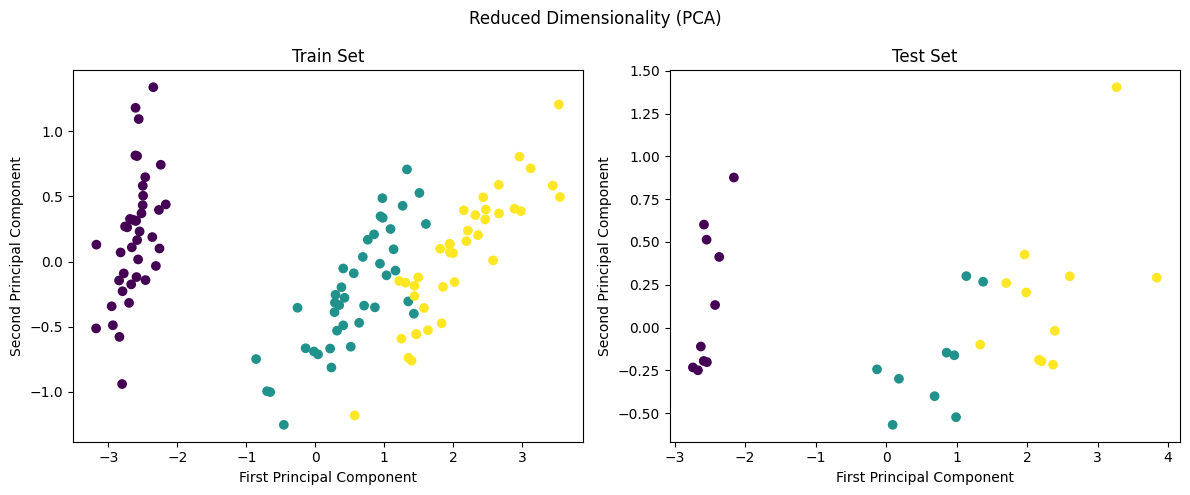

In [5]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].scatter(X_train_reduced[:,0], X_train_reduced[:,1], c=y_train)
ax[0].set_xlabel("First Principal Component")
ax[0].set_ylabel("Second Principal Component")
ax[0].set_title("Train Set")

ax[1].scatter(X_test_reduced[:,0], X_test_reduced[:,1], c=y_test)
ax[1].set_xlabel("First Principal Component")
ax[1].set_ylabel("Second Principal Component")
ax[1].set_title("Test Set")

plt.suptitle("Reduced Dimensionality (PCA)")

plt.tight_layout()

plt.plot()

## Non-negative Matrix Factorization (NMF)

In [6]:
nmf = NMF(k=2, random_state=42)
W, H = nmf.fit(X, 500)

print("Original Shape:", X.shape)
print("Features Matrix Shape:", W.shape)
print("Coeffcients Matrix Shape:", H.shape)

Original Shape: (150, 4)
Features Matrix Shape: (150, 2)
Coeffcients Matrix Shape: (2, 4)


[]

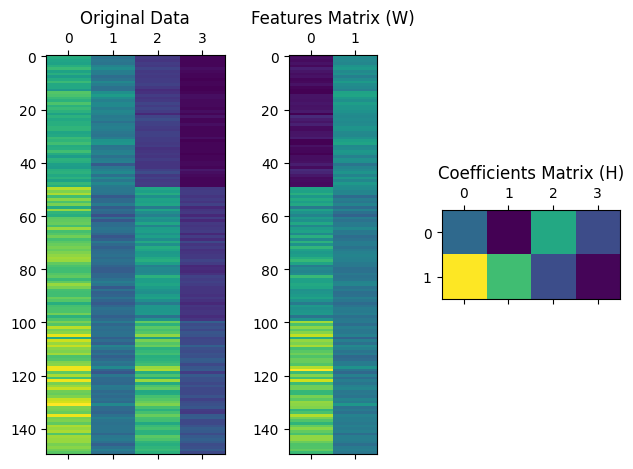

In [7]:
fig, ax = plt.subplots(1,3)

ax[0].matshow(X, aspect='auto')
ax[0].set_title("Original Data")

ax[1].matshow(W, aspect=0.06)
ax[1].set_title("Features Matrix (W)")

ax[2].matshow(H)
ax[2].set_title("Coefficients Matrix (H)")

plt.tight_layout()

plt.plot()

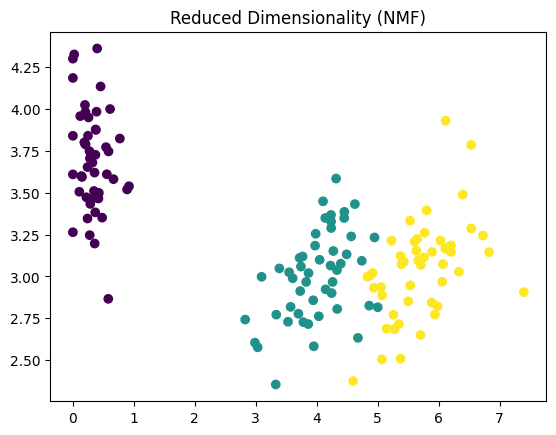

In [8]:
plt.scatter(W[:,0], W[:,1], c=y)
plt.title('Reduced Dimensionality (NMF)')
plt.show()

# Nonlinear Dimensionality Reduction

## Kernel PCA

### Generating Example Data

[]

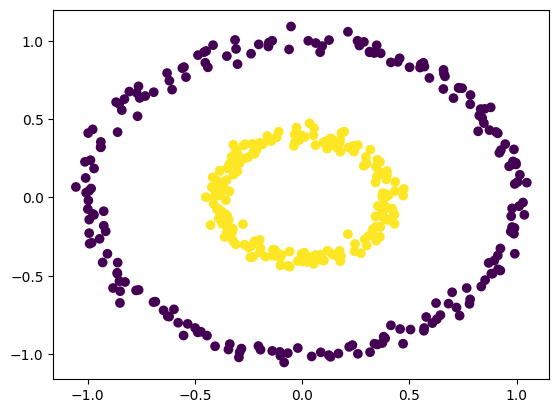

In [9]:
X, y = make_circles(n_samples=500, noise=0.03, factor=0.4, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.plot()

In [10]:
kernel_pca = KernelPCA(n_comp=3)
X_train_3d = kernel_pca.fit_transform(X_train)
X_test_3d = kernel_pca.transform(X_test)

[]

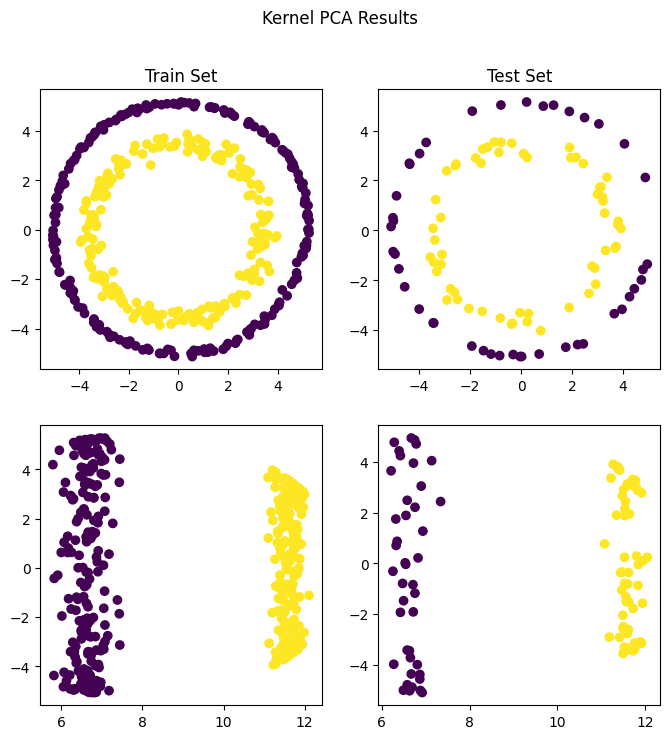

In [11]:
fig, ax = plt.subplots(2,2, figsize=(8,8))

ax[0,0].scatter(X_train_3d[:,1], X_train_3d[:,2], c=y_train)
ax[1,0].scatter(X_train_3d[:,0], X_train_3d[:,1], c=y_train)
ax[0,0].set_title("Train Set")

ax[0,1].scatter(X_test_3d[:,1], X_test_3d[:,2], c=y_test)
ax[1,1].scatter(X_test_3d[:,0], X_test_3d[:,1], c=y_test)
ax[0,1].set_title("Test Set")

plt.suptitle("Kernel PCA Results")

plt.plot()